In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import torch
import numpy as np
import pandas as pd
import os
import math
import numbers
import matplotlib.pyplot as plt


In [5]:
inputpath = '../set-a/'
inputdict = {
    "ALP" : 0,             # o
    "ALT" : 1,             # o
    "AST" : 2,             # o
    "Albumin" : 3,         # o
    "BUN" : 4,             # o
    "Bilirubin" : 5,       # o
    "Cholesterol" : 6,     # o
    "Creatinine" : 7,      # o
    "DiasABP" : 8,         # o
    "FiO2" : 9,            # o
    "GCS" : 10,            # o
    "Glucose" : 11,        # o
    "HCO3" : 12,           # o
    "HCT" : 13,            # o
    "HR" : 14,             # o
    "K" : 15,              # o
    "Lactate" : 16,        # o
    "MAP" : 17,            # o
    "Mg" : 18,             # o
    "Na" : 19,             # o
    "PaCO2" : 20,          # o
    "PaO2" : 21,           # o
    "Platelets" : 22,      # o
    "RespRate" : 23,       # o
    "SaO2" : 24,           # o
    "SysABP" : 25,         # o
    "Temp" : 26,           # o
    "Tropl" : 27,          # o
    "TroponinI" : 27,      # temp: regarded same as Tropl
    "TropT" : 28,          # o
    "TroponinT" : 28,      # temp: regarded same as TropT
    "Urine" : 29,          # o
    "WBC" : 30,            # o
    "Weight" : 31,         # o
    "pH" : 32,             # o
    "NIDiasABP" : 33,      # unused variable
    "NIMAP" : 34,          # unused variable
    "NISysABP" : 35,       # unused variable
    "MechVent" : 36,       # unused variable
    "RecordID" : 37,       # unused variable
    "Age" : 38,            # unused variable
    "Gender" :39,          # unused variable
    "ICUType" : 40,        # unused variable
    "Height": 41           # unused variable
}

In [6]:
# functions to process the time in the data
def timeparser(time):
    return pd.to_timedelta(time + ':00')

def timedelta_to_day_figure(timedelta):
    return timedelta.days + (timedelta.seconds/86400) #(24*60*60)

In [7]:
# group the data by time
def df_to_inputs(df, inputdict, inputs):
    grouped_data = df.groupby('Time')
            
    for row_index, value in df.iterrows():
        '''
        t = colum ~ time frame
        agg_no = row ~ variable
        '''
        
        agg_no = inputdict[value.Parameter]

        #print('agg_no : {}\t  value : {}'.format(agg_no, value.Value))
        inputs[agg_no].append(value.Value)    
        
    return inputs

In [8]:
inputs = []

# prepare empty list to put data
# len(inputdict)-2: two items has same agg_no
for i in range(len(inputdict)-2):
    t = []
    inputs.append(t)

# read all the files in the input folder
for filename in os.listdir(inputpath):
    df = pd.read_csv(inputpath + filename, header=0,\
                     parse_dates=['Time'], date_parser=timeparser)
    
    inputs = df_to_inputs(df=df, inputdict=inputdict, inputs=inputs)

print(inputs[0][0])

94.0


In [10]:
# make input items list
input_columns = list(inputdict.keys())

'''
remove two overlaped items
"TroponinI" : 27, #temp
"TroponinT" : 28, #temp

'''
input_columns.remove("TroponinI")
input_columns.remove("TroponinT")
print(input_columns)
print(len(input_columns))

['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Bilirubin', 'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Lactate', 'MAP', 'Mg', 'Na', 'PaCO2', 'PaO2', 'Platelets', 'RespRate', 'SaO2', 'SysABP', 'Temp', 'Tropl', 'TropT', 'Urine', 'WBC', 'Weight', 'pH', 'NIDiasABP', 'NIMAP', 'NISysABP', 'MechVent', 'RecordID', 'Age', 'Gender', 'ICUType', 'Height']
42


In [11]:
# describe the data
# print count, min, max, mean, median, std, var and histogram if hist == True
# return values as a list
def describe(inputs, input_columns, inputdict, hist = False):
    
    desc = [] 
    
    for i in range(len(inputdict)-2):
        input_arr = np.asarray(inputs[i])
        
        des = []
        
        des.append(input_arr.size)
        des.append(np.amin(input_arr))
        des.append(np.amax(input_arr))
        des.append(np.mean(input_arr))
        des.append(np.median(input_arr))
        des.append(np.std(input_arr))
        des.append(np.var(input_arr))
        
        desc.append(des)
        
        # print histgram
        if hist:
            a = np.hstack(input_arr)
            plt.hist(a, bins='auto')
            plt.title("Histogram about {}".format(input_columns[i]))
            plt.show()
        
        print('count: {}, min: {}, max: {}'.format(des[0], des[1], des[2]))
        print('mean: {}, median: {}, std: {}, var: {}'.format(des[3], des[4], des[5], des[6]))
    
    return desc        

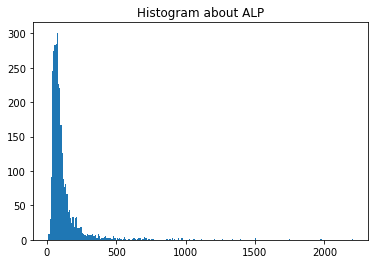

count: 3092, min: 12.0, max: 2205.0
mean: 116.77328589909443, median: 82.0, std: 133.88381709195593, var: 17924.87647911231


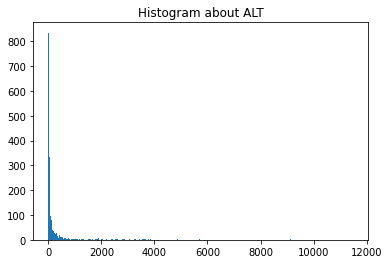

count: 3177, min: 1.0, max: 11470.0
mean: 394.4749763928234, median: 43.0, std: 1199.980190826508, var: 1439952.4583760228


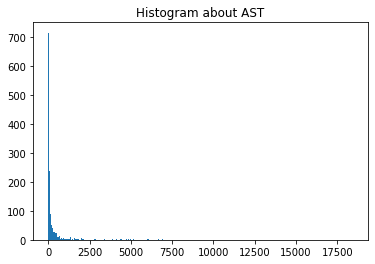

count: 3182, min: 4.0, max: 18430.0
mean: 506.2840980515399, median: 64.0, std: 1516.1916042785547, var: 2298836.9808847774


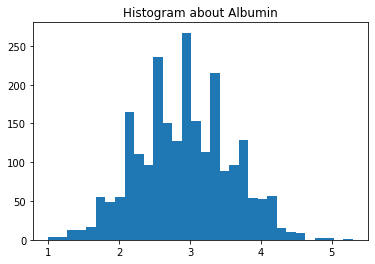

count: 2356, min: 1.0, max: 5.3
mean: 2.9223259762309, median: 2.9, std: 0.6514075310421351, var: 0.4243317714984103


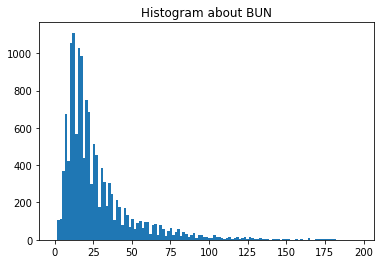

count: 13916, min: 0.0, max: 197.0
mean: 27.416527737855706, median: 20.0, std: 23.393032927627267, var: 547.2339895530536


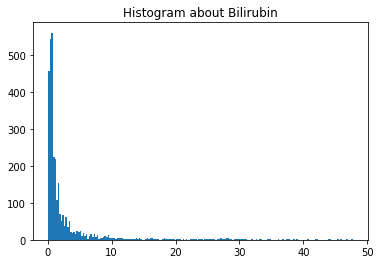

count: 3191, min: 0.1, max: 47.7
mean: 2.908555311814478, median: 0.9, std: 5.903983019417633, var: 34.85701549357175


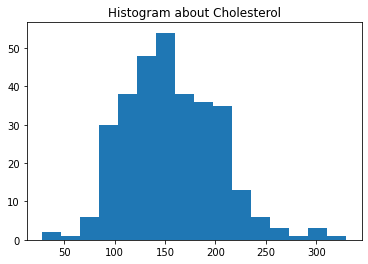

count: 315, min: 28.0, max: 330.0
mean: 156.51746031746032, median: 152.0, std: 45.99491531484598, var: 2115.532234819854


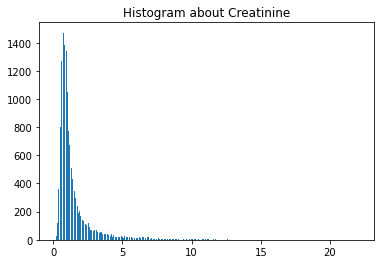

count: 13983, min: 0.1, max: 22.1
mean: 1.5049774726453549, median: 1.0, std: 1.635940329877449, var: 2.676300762919537


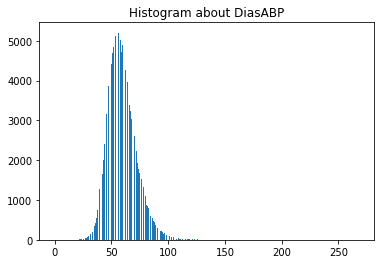

count: 145567, min: 0.0, max: 268.0
mean: 59.29051227269917, median: 58.0, std: 13.318150168032814, var: 177.37312389827244


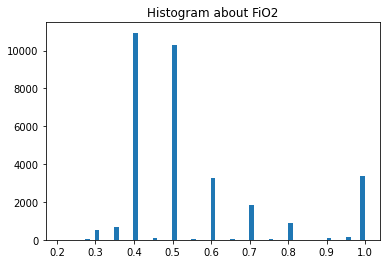

count: 32390, min: 0.21, max: 1.0
mean: 0.5452014510651436, median: 0.5, std: 0.18984649512536758, var: 0.03604169171138622


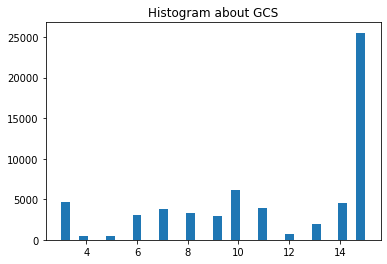

count: 61563, min: 3.0, max: 15.0
mean: 11.398713512986697, median: 13.0, std: 3.973384107597854, var: 15.787781266511194


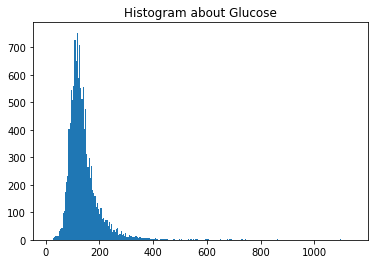

count: 13021, min: 10.0, max: 1143.0
mean: 141.5095614776131, median: 127.0, std: 67.69497269352857, var: 4582.609327977579


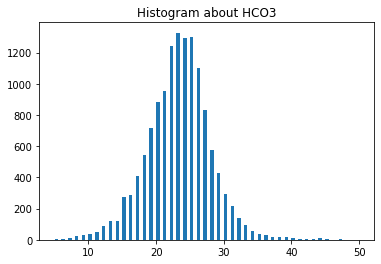

count: 13613, min: 5.0, max: 50.0
mean: 23.11574230514949, median: 23.0, std: 4.710165655553443, var: 22.185660502755194


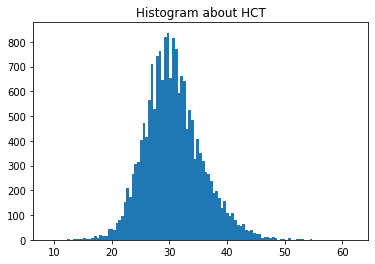

count: 18271, min: 9.0, max: 61.8
mean: 30.67904329264955, median: 30.3, std: 5.013220252647734, var: 25.132377301557415


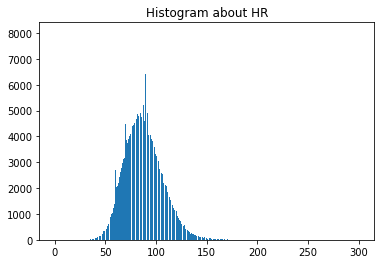

count: 228538, min: 0.0, max: 300.0
mean: 87.51744217591822, median: 86.0, std: 18.4049963443074, var: 338.7438904339688


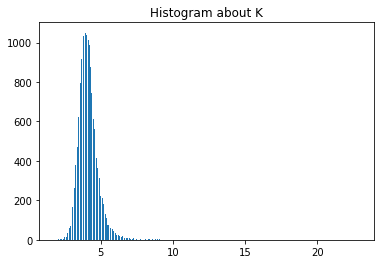

count: 14440, min: 1.8, max: 22.9
mean: 4.136218836565097, median: 4.1, std: 0.7070606291358562, var: 0.49993473327399274


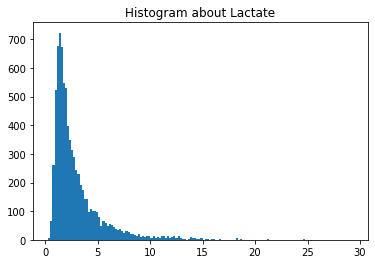

count: 8024, min: 0.3, max: 29.3
mean: 2.924779411764706, median: 2.1, std: 2.579141072175832, var: 6.6519686701843


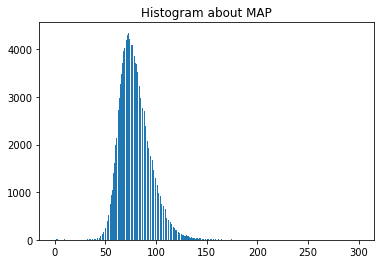

count: 145760, min: 0.0, max: 300.0
mean: 79.74292672886938, median: 77.0, std: 16.926822834796283, var: 286.51733128058083


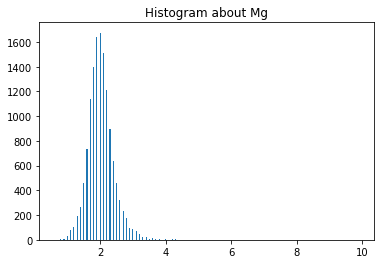

count: 13590, min: 0.6, max: 9.9
mean: 2.0279102281089036, median: 2.0, std: 0.4221239657011912, var: 0.17818864241930044


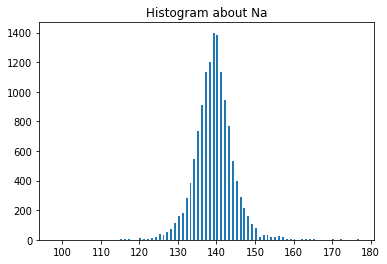

count: 13570, min: 98.0, max: 177.0
mean: 139.07582903463523, median: 139.0, std: 5.19109386912776, var: 26.947455558095825


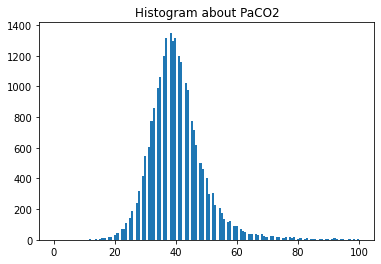

count: 23293, min: 0.3, max: 100.0
mean: 40.47474777830249, median: 39.0, std: 9.126020846980067, var: 83.28425649951477


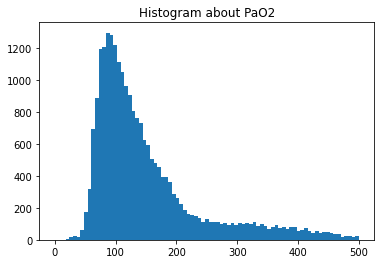

count: 23268, min: 0.0, max: 500.0
mean: 150.41526860924876, median: 121.0, std: 89.29887429104858, var: 7974.288949648496


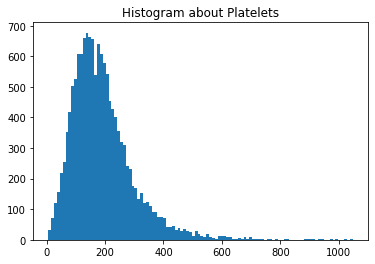

count: 14104, min: 6.0, max: 1047.0
mean: 190.81571894498015, median: 172.0, std: 106.3917362142324, var: 11319.201534678808


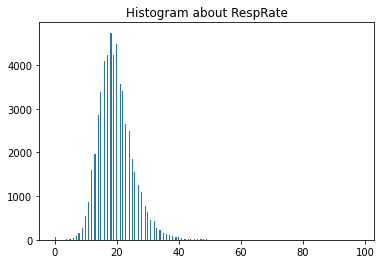

count: 55051, min: 0.0, max: 98.0
mean: 19.723728905923597, median: 19.0, std: 5.552301672088858, var: 30.828053857880732


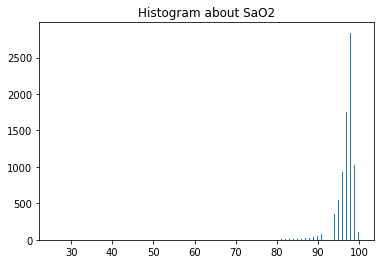

count: 8185, min: 26.0, max: 100.0
mean: 96.63706780696396, median: 97.0, std: 3.4000868440410503, var: 11.56059054702103


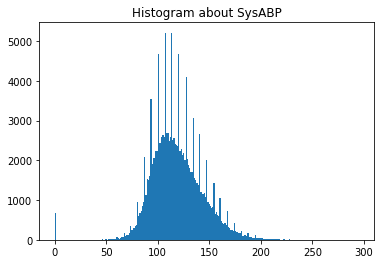

count: 145650, min: 0.0, max: 295.0
mean: 118.6978990731205, median: 116.0, std: 25.01615547443329, var: 625.8080347210188


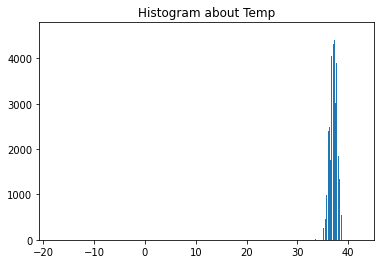

count: 86405, min: -17.8, max: 42.1
mean: 37.00765117759389, median: 37.1, std: 1.7751633850901567, var: 3.151205043764744


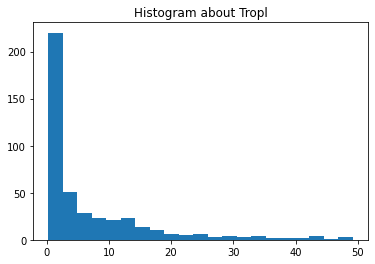

count: 435, min: 0.3, max: 49.2
mean: 7.1512643678160925, median: 2.6, std: 9.75616596124948, var: 95.18277426344298


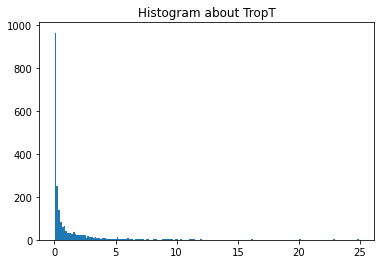

count: 2126, min: 0.01, max: 24.91
mean: 1.1984510818438383, median: 0.2, std: 2.713768147438015, var: 7.364537558049157


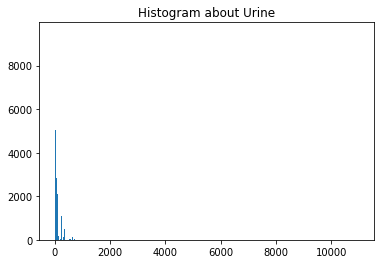

count: 136918, min: 0.0, max: 11000.0
mean: 120.7987284359982, median: 70.0, std: 184.725839486602, var: 34123.635774029855


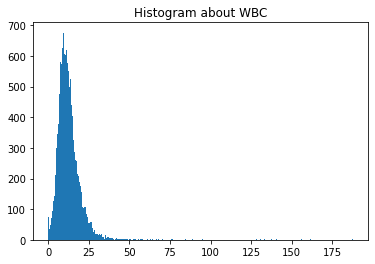

count: 12910, min: 0.1, max: 187.5
mean: 12.670084430673894, median: 11.4, std: 7.6412549541321315, var: 58.38877727404884


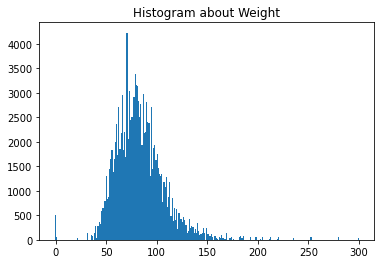

count: 129165, min: -1.0, max: 300.0
mean: 83.38661525955172, median: 80.6, std: 25.047736295633516, var: 627.3890935355967


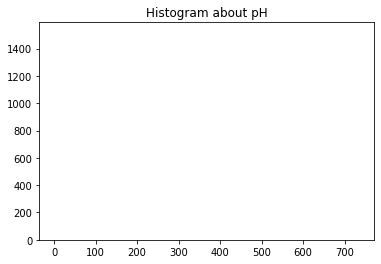

count: 24355, min: 1.0, max: 735.0
mean: 7.489199753644017, median: 7.38, std: 8.243936500293186, var: 67.96248902086627


KeyboardInterrupt: ignored

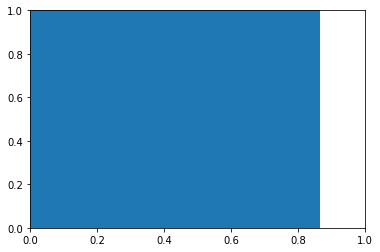

In [17]:
desc = describe(inputs, input_columns, inputdict, hist=True)
desc = np.asarray(desc)
desc.shape